# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env_file_path = 'Reacher_Environment/one_agent/Reacher_Windows_x86_64/Reacher.exe'
# env_file_path = 'Reacher_Environment/twenty_agents/Reacher_Windows_x86_64/Reacher.exe'
env = UnityEnvironment(file_name=env_file_path, worker_id=0, seed=0, no_graphics=False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
print(env.brain_names)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain_name

['ReacherBrain']


'ReacherBrain'

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('\nShapes:')
print("rewards", len(env_info.rewards))
print("vector_observations", env_info.vector_observations.shape)
print("local_done", len(env_info.local_done))

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]

Shapes:
rewards 1
vector_observations (1, 33)
local_done 1


In [5]:
print(brain.vector_action_space_size, brain.vector_action_space_type)
print(brain.vector_observation_space_size, brain.vector_observation_space_type)

4 continuous
33 continuous


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
for _ in range(50):
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [7]:
# env.close()

In [8]:
print(repr(states))
print(repr(actions))
print(repr(rewards))
print(repr(dones))

array([[ 2.05587196, -2.95691419, -1.75735378,  0.93016797,  0.25569877,
         0.06979565, -0.25403616,  0.22485964, -0.79854548,  1.36673391,
         5.57289076,  3.0581336 ,  0.86991364,  5.2179718 , -6.4728899 ,
        -0.90593922,  0.83753115,  0.37779108,  0.11971913,  0.37614223,
         1.39888644, -1.17144012,  0.72973895,  7.33476305,  2.65092897,
         1.79401541,  6.52134228, -1.        , -4.63379908,  0.        ,
         1.        ,  0.        , -0.53301406]])
array([[ 0.51272432, -0.67532808, -0.05828105, -0.86629037]])
[0.0]
[False]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
import random
from collections import deque

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from ddpg_agent import Agent

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [10]:
hyperparams = {
    # Reproducibility
    'seed'                : 0,        # random seed for reproducible results
    
    # Agent basic parameters
    'batch_size'          : 256,      # batch size for each learning step
    'buffer_size'         : int(1e6), # up to how many recent experiences to keep
    'start_since'         : 256,      # how many experiences to collect before starting learning
    'gamma'               : 0.99,     # discount factor
    'update_every'        : 20,       # update step frequency
    'n_updates'           : 10,       # number of updates per update step
    'tau'                 : 1e-3,     # soft-update parameter [0, 1]
    
    'actor_lr'            : 1e-4,     # learning rate for the actor network
    'critic_lr'           : 1e-4,     # learning rate for the critic network
    'clip'                : 1,        # gradient clipping to prevent gradient spikes
    'weight_decay'        : 0,        # weight decay for the *critic* network
    
    'dueling'             : False,    # whether to use a dueling architecture
    'distributional'      : True,     # whether to use distributional learning

    # Prioritized Experience Replay Parameters
    'priority_eps'        : 1e-3,     # base priority in order to ensure nonzero priorities
    'a'                   : 1.,       # priority exponent parameter [0, 1]

    # n-step Bootstrap Target parameter
    'n_multisteps'        : 5,        # number of steps to bootstrap
    'separate_experiences': False,    # whether to store experiences with no overlap

    # Distributional Learning parameters
    'v_min'               : 0,        # minimum value for support
    'v_max'               : 10,       # maximum value for support
    'n_atoms'             : 51,       # number of atoms for distribution

    # Noisy Layer parameters
    'initial_sigma'       : 0.050,    # initial noisy parameter value
    'linear_type'         : 'noisy',  # either 'linear' or 'noisy'
    'factorized'          : False     # whether to use factorized gaussian noise or not(independent gaussian noise)
}

### -------------------------------------------------------------------------------------------------------------- ###

train_params = {
    'n_episodes'           : 2000,  # number of total episodes to train
    'continue_after_solved': False, # whether to keep training even after the environment is solved
    
    # Exploration using gaussian noise
    'eps_start'            : 0.0,   # initial epsilon value
    'eps_min'              : 0.00,  # minimum value for epsilon
    'eps_decay'            : 0.000, # epsilon decay rate

    # Importance-Sampling Weight parameter for Prioritized Experience Replay
    'beta_start'           : 1.,   # starting value 
    'beta_end'             : 1.    # end value
}

In [11]:
agent = Agent(state_size, action_size, num_agents, **hyperparams)

print(agent.actor_local)
print()
print(agent.critic_local)

Actor(
  (fc0): NoisyLinear(in_features=33, out_features=256, bias=True, initial_sigma=0.05, factorized=False)
  (fc1): NoisyLinear(in_features=256, out_features=128, bias=True, initial_sigma=0.05, factorized=False)
  (fc2): NoisyLinear(in_features=128, out_features=4, bias=True, initial_sigma=0.05, factorized=False)
  (hidden_activation): LeakyReLU(negative_slope=0.01)
  (output_activation): Tanh()
)

Critic(
  (fcs0): Linear(in_features=33, out_features=256, bias=True)
  (fc1): Linear(in_features=260, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=51, bias=True)
  (hidden_activation): LeakyReLU(negative_slope=0.01)
)


Episode 10 | Total Steps: 10010 | Current Average Score:  0.590 | Last 100 Average Score:  0.940 | Epsilon: 0.0000 | A: 1.0000 | Beta: 1.0000 | Avg Actor Noise Magnitude: 0.0480 +- 0.0057            
Episode 20 | Total Steps: 20020 | Current Average Score:  0.040 | Last 100 Average Score:  0.895 | Epsilon: 0.0000 | A: 1.0000 | Beta: 1.0000 | Avg Actor Noise Magnitude: 0.0423 +- 0.0098            
Episode 30 | Total Steps: 30030 | Current Average Score:  2.220 | Last 100 Average Score:  1.306 | Epsilon: 0.0000 | A: 1.0000 | Beta: 1.0000 | Avg Actor Noise Magnitude: 0.0375 +- 0.0119            
Episode 40 | Total Steps: 40040 | Current Average Score:  1.090 | Last 100 Average Score:  1.423 | Epsilon: 0.0000 | A: 1.0000 | Beta: 1.0000 | Avg Actor Noise Magnitude: 0.0329 +- 0.0134            
Episode 50 | Total Steps: 50050 | Current Average Score:  1.190 | Last 100 Average Score:  1.524 | Epsilon: 0.0000 | A: 1.0000 | Beta: 1.0000 | Avg Actor Noise Magnitude: 0.0288 +- 0.0142            


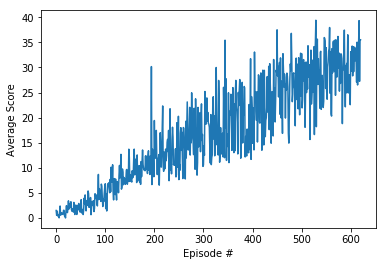

In [12]:
# env = UnityEnvironment(file_name=env_file_path, worker_id=0, seed=101, no_graphics=False)

def ddpg(n_episodes, eps_start=0.3, eps_min=0.01, eps_decay=0.99, beta_start=0.4, beta_end=1., continue_after_solved=True):
    """highly modified Deep Deterministic Policy Gradient
    (DDPG + Prioritized Experience Replay + Dueling Architecture + Distribution + Noisy Layers)
    (I'm not sure if there's any official name or similar methods)
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): initial epsilon value for gaussian noise
        eps_min (float): minimum value for epsilon
        eps_decay (float): epsilon decay factor
        beta_start (float): initial importance-sampling weight for prioritized experience replay
        beta_end (float): final importance-sampling weight for prioritized experience replay
        continue_after_solved (bool): whether to continue training after reaching the average score 30
    """
    solved = False
    mean_scores = []
    mean_scores_window = deque(maxlen=100)
    
    eps = eps_start

    agent.beta = beta_start

    actor_noisy_params  = [param for name, param in agent.actor_local.named_parameters()
                           if name.endswith('noisy_weight') or name.endswith('noisy_bias')]
    critic_noisy_params = [param for name, param in agent.critic_local.named_parameters()
                           if name.endswith('noisy_weight') or name.endswith('noisy_bias')]
    
    report_str_basic_format = "\rEpisode {:d} | Total Steps (all agents): {:d}"\
        " | Current Average Score: {:>6.3f} | Last 100 Average Score: {:>6.3f}"\
        " | Epsilon: {:>6.4f} | A: {:>6.4f} | Beta: {:>6.4f}"
    report_str = report_str_basic_format.format(0, 0, 0, 0, eps, agent.a, agent.beta)
    
    n_steps_taken = 0
    try:
        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]            # reset the environment
            states = env_info.vector_observations                        # get the current state (for each agent)
            scores = np.zeros(num_agents)                                # initialize the score (for each agent)
            t = 0
            while True:
                actions = agent.act(states)                              # choose actions
                actions = np.clip(actions + eps * np.random.randn(*actions.shape), -1, 1) # add noise
                env_info = env.step(actions)[brain_name]                 # send all actions to the environment
                next_states = env_info.vector_observations               # get next state (for each agent)
                rewards = env_info.rewards                               # get reward (for each agent)
                dones = env_info.local_done                              # see if episode finished
                agent.step(states, actions, rewards, next_states, dones) # take a step
                t += 1
                n_steps_taken += num_agents
                scores += env_info.rewards                               # update the score (for each agent)
                states = next_states                                     # roll over states to next time step
                print(report_str + " *** timestep {:d} ***".format(t), end='')
                if np.any(dones):                                        # exit loop if episode finished
                    break

            agent.reset()                                                # reset the secondary buffer for multisteps

            mean_score = np.mean(scores)                                 # get the average score across all agents
            mean_scores.append(mean_score)                               # append the average score to scores log
            mean_scores_window.append(mean_score)                        # append the average score to scores window

            mean_scores_window_average = np.mean(mean_scores_window)

            report_str = report_str_basic_format.format(i_episode, n_steps_taken,
                                                        mean_score, mean_scores_window_average,
                                                        eps, agent.a, agent.beta)
            if actor_noisy_params:
                flattened_abs_noise = np.concatenate([param.data.abs().cpu().numpy().reshape((-1,))
                                                      for param in actor_noisy_params])
                report_str += " | Avg Actor Noise Magnitude: {:>6.4f} +- {:<6.4f}"\
                              .format(np.mean(flattened_abs_noise), np.std(flattened_abs_noise))
            if critic_noisy_params:
                flattened_abs_noise = np.concatenate([param.data.abs().cpu().numpy().reshape((-1,))
                                                      for param in critic_noisy_params])
                report_str += " | Avg Critic Noise Magnitude: {:>6.4f} +- {:<6.4f}"\
                              .format(np.mean(flattened_abs_noise), np.std(flattened_abs_noise))

            report_str += 

            if i_episode % 10 == 0:
                print(report_str, end='\n')
            else:
                print(report_str + "                                     ", end='')

            if not solved and mean_scores_window_average >= 30:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'\
                      .format(i_episode-100, mean_scores_window_average))
                solved = True
                if not continue_after_solved:
                    break

            eps = max(eps_min, eps * eps_decay)
            agent.beta = beta_start + (beta_end - beta_start) * (i_episode / n_episodes)
    
    except KeyboardInterrupt:
        return mean_scores

    return mean_scores



scores = ddpg(**train_params)

# env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.show();

In [ ]:
agent.noise(True)
score_avgs = []
report_str_format = "\rEpisode {} | Current Episode Average Score: {:.3f} | Previous Episode Average Score: {:.3f} | Overall Average Score: {:.3f}"
for i in range(10):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)                        # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        print(report_str_format.format(i+1, np.mean(scores), score_avgs[-1] if score_avgs else 0, np.mean(score_avgs) if score_avgs else 0), end='')
        if np.any(dones):                                  # exit loop if episode finished
            break
    if (i+1) % 10 == 0:
        print()
    score_avgs.append(np.mean(scores))
print("\nFinal Average Score: {}".format(np.mean(score_avgs)))

In [ ]:
agent.noise(False)
score_avgs = []
report_str_format = "\rEpisode {} | Current Episode Average Score: {:.3f} | Previous Episode Average Score: {:.3f} | Overall Average Score: {:.3f}"
for i in range(10):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)                        # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        print(report_str_format.format(i+1, np.mean(scores), score_avgs[-1] if score_avgs else 0, np.mean(score_avgs) if score_avgs else 0), end='')
        if np.any(dones):                                  # exit loop if episode finished
            break
    if (i+1) % 10 == 0:
        print()
    score_avgs.append(np.mean(scores))
print("\nFinal Average Score: {}".format(np.mean(score_avgs)))

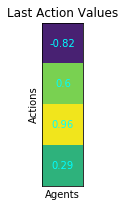

In [13]:
fig = plt.figure(facecolor='w', figsize=(15, 3))
ax = fig.add_subplot(111)
ax.imshow(actions.T, cmap='viridis', vmin=-1, vmax=1)
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_title('Last Action Values')
ax.set_xlabel('Agents')
ax.set_ylabel('Actions')
for i in range(actions.shape[1]):
    for j in range(actions.shape[0]):
        text = ax.text(j, i, round(actions[j, i], 2),
                       ha="center", va="center", color="cyan")
plt.show();

tensor([1.6040e-02, 4.8508e-02, 1.2778e-01, 2.2502e-01, 2.5459e-01, 1.9336e-01,
        9.6636e-02, 3.1390e-02, 6.0393e-03, 6.0204e-04, 2.0189e-05, 4.2925e-08,
        3.8492e-08, 3.4849e-08, 3.2742e-08, 2.9952e-08, 2.5665e-08, 2.1833e-08,
        2.0067e-08, 1.6054e-08, 1.3827e-08, 1.1757e-08, 9.5427e-09, 8.2204e-09,
        7.1921e-09, 6.4122e-09, 5.5865e-09, 4.2979e-09, 4.0158e-09, 3.1379e-09,
        2.8183e-09, 2.6176e-09, 2.0385e-09, 1.7698e-09, 1.4610e-09, 1.1201e-09,
        1.0529e-09, 9.0127e-10, 6.0541e-10, 5.5515e-10, 3.9925e-10, 3.5439e-10,
        2.5527e-10, 2.3010e-10, 1.4714e-10, 9.0933e-11, 9.3584e-11, 4.3909e-11,
        3.0216e-11, 1.2926e-11, 1.4543e-11])

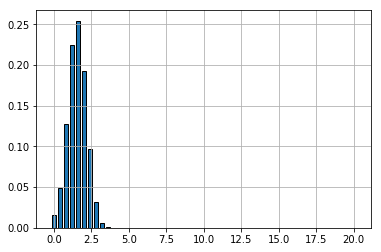

In [14]:
with torch.no_grad():
    dist = F.softmax(agent.critic_local(torch.tensor(states).float().to(device), agent.actor_local(torch.tensor(states).float().to(device))), dim=-1).squeeze(0).cpu()

fig, ax = plt.subplots(1, 1)
ax.grid()
ax.bar(x=agent.supports.cpu().numpy(), height=dist, width=0.3, edgecolor='black')
dist

In [15]:
# env = UnityEnvironment(file_name=env_file_path, worker_id=0, seed=0, no_graphics=False)

print("[Noisy]")
agent.noise(True)
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
t = 0                                                  # initialize the time step count
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    t += 1
    print("\rCurrent Average Score at timestep {}: {}".format(t, np.mean(scores)), end='')
    if np.any(dones):                                  # exit loop if episode finished
        break
print("\nFinal Average Score: {}".format(np.mean(scores)))

print("\n\n")

print("[Deterministic]")
agent.noise(False)
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
t = 0                                                  # initialize the time step count
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    t += 1
    print("\rCurrent Average Score at timestep {}: {}".format(t, np.mean(scores)), end='')
    if np.any(dones):                                  # exit loop if episode finished
        break
print("\nFinal Average Score: {}".format(np.mean(scores)))
agent.noise(True)

[Noisy]
Current Average Score at timestep 1001: 26.219999413937332
Final Average Score: 26.21999941393733



[Deterministic]
Current Average Score at timestep 1001: 24.269999457523227
Final Average Score: 24.269999457523227


In [ ]:
env.close()